<img src=https://w-dog.ru/wallpapers/8/16/329103378078875/snegoviki-ogni-elka-novogodnie-ukrasheniya-novyj-god-rozhdestvo.jpg><br>
<hr style="border: 10px solid green;" />

## <span style="color:green">Финальный комментарий<span>
Спасибо за проделанную работу🤝

Максим, спасибо за доработки, всё принято👌
    
Молодец, что удалось реализовать цикл автоматических проверок. Желаю дальнейших успехов и новогоднего настроения☃️

Поздравляю, проект принят👍

<hr style="border: 2px solid green;" />

## Комментарий ревьювера 2

Максим, привет! 

Оставил дополнительные комментарии по твоим вопросам, думаю, всё должно получиться.

<hr style="border: 2px solid green;" />

## Комментарий ревьювера

Максим, привет! 

🤚Меня зовут, Олег Юрьев, я буду проверять твой проект. Если не против, я буду обращаться к тебе на _ТЫ_ . Если это неприемлемо, обязательно напиши мне в комментариях - мы перейдем на _ВЫ_ .

🤝Спасибо, что сдал проект вовремя. Тобой проделана большая работа, молодец! 

✏️В этой тетрадке ты найдешь мои комментарии.

Комментарии будут выделены:

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа ✅</b><br>
    Безупречная работа</div>       
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить ⚠️</b><br>
    Ничего дорабатывать не надо, данные пункты работают нормально, но есть способы улучшить. Несколько таких комментариев допустимы, но более - придется некоторые доработать. Большое кол-во мелких замечаний и помарок сказываются на общем впечатлении от работы.</div>   
<br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать ⛔️</b><br>
    Такие пункты необходимо исправить в первую очередь, чтобы я смог принять проект.</div>
 
Не удаляй комментарии, так будем следить за динамикой 📈
   
Давай будем в диалоге - основные цели в диалоге:
- обмен опытом (да я тоже учусь у студентов👨‍🎓)
- выполнить проект еще лучше
- помочь тебе стать аналитиком

Поэтому чтобы мне проще было проверять повторно, а тебе контролировать процесс ревью, оставляй свои комментарии и выделяй их. 
    
<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Комментарий студента:</b> Например, вот так.</div>
   
Поехали! :)

<hr style="border: 2px solid green;" />

# Кейс для стартапа, продающего продукты питания

**Цель проекта** - разобраться, как ведут себя пользователи мобильного приложения.

**Задачи:**
1. Изучить воронку продаж. 
2. Узнайте, как пользователи доходят до покупки. 
3. Ответить на вопрос сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?
4. Исследовать результаты A/A/B-эксперимента в рамках которого необходимо понять какой шрифт на сайте лучше, новый или старый

## Импортируем нужные библиотеки и читаем данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math as mth
from statsmodels.stats.proportion import proportions_ztest

In [2]:
data = pd.read_csv('/datasets/logs_exp.csv', sep='\t')

## Предобработка данных

In [3]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


1. Поменяем названия переменных
2. Добавим столбец с датой и временем и отдельно с датой
3. Корректируем типы переменных, проверяем пропуски

In [4]:
data = data.rename(columns={'EventName': 'name',
                    'DeviceIDHash': 'device',
                    'EventTimestamp': 'timestamp',
                    'ExpId': 'experiment'})

In [5]:
data['date_time'] = pd.to_datetime(data['timestamp'], unit='s')
data['date'] = data['date_time'].dt.date

In [6]:
data.head()

,name,device,timestamp,experiment,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25


In [7]:
data['date'] = data['date'].astype('datetime64')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   name        244126 non-null  object        
 1   device      244126 non-null  int64         
 2   timestamp   244126 non-null  int64         
 3   experiment  244126 non-null  int64         
 4   date_time   244126 non-null  datetime64[ns]
 5   date        244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 11.2+ MB


Пропущенных значений в данных нет

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить - ⚠️</b><br>
Зачем вызывать для каждого столбца <code>isna()</code> - нет доверия к <code>info</code>🤔</div> <br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
<b>Комментарий студента:</b> Поправил.

## Изучение и проверка данных

In [9]:
print(f"Кол-во событий: {data['name'].count()}")

Кол-во событий: 244126


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить - ⚠️</b><br>
Рекомендую не оставлять цифры голыми, а добавлять к ним комментарий - так удобнее читать и проверять работу, нет необходимости искать в коде, что же это за цифра - пример ниже</div> <br>


<hr style="border: 2px solid orange;" />

In [10]:
print(f"Кол-во уникальных пользователей: {data['device'].nunique()}")

Кол-во уникальных пользователей: 7551


<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
Предыдущие проекты и теория показывали, что есть случаи, когда оценка среднего с помощью простого среднего арифметического может быть некорректной. Хорошей практикой является построение гистограммы и определения подходящей статистики</div><br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
<b>Комментарий студента:</b> В целом не очень понимаю зачем здесь оценивать среднее значение...

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить - ⚠️ 2</b><br>
Два момента:
    <ul>
    <li>  1. Узнать есть ли аномалии, может быть нужно отфильтровать пользователей, которые слишком активны
    <li> 2. Предполагается, что изучение кол-ва событий на пользователя в разрезе групп может показать их различие</ul>

 </div> <br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
<b>Комментарий студента:</b> Готово ниже

In [11]:
data_device = data.pivot_table(values='name', index='device', aggfunc=('count'))
data_device

,name
device,
6888746892508752,1
6909561520679493,5
6922444491712477,47
7435777799948366,6
7702139951469979,137
...,...
9217594193087726423,9
9219463515465815368,17
9220879493065341500,7


In [12]:
data_device['name'].describe()

count    7551.000000
mean       32.330287
std        65.312344
min         1.000000
25%         9.000000
50%        20.000000
75%        37.500000
max      2308.000000
Name: name, dtype: float64

Медианное кол-во действий, которое предпринял каждый пользователь равно 19. Посмотрим на выбросы

<AxesSubplot:xlabel='device'>

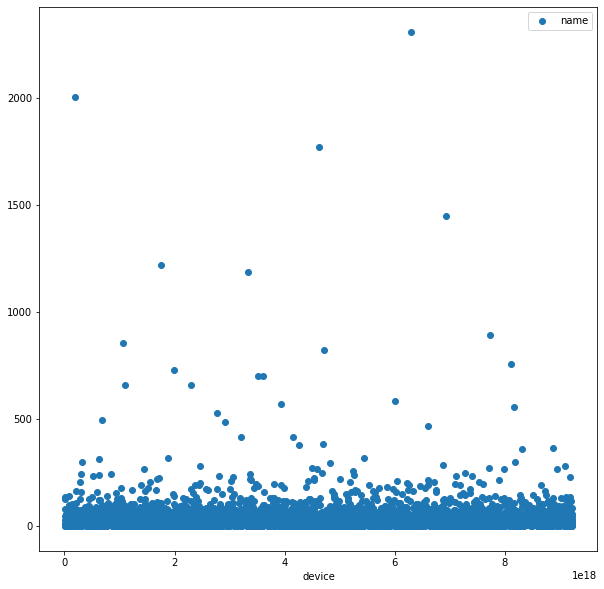

In [13]:
data.pivot_table(values='name', index='device', aggfunc=('count')).plot(style='o',figsize=(10,10))

In [14]:
data_device[data_device['name'] > 500].count()

name    19
dtype: int64

500 и больше действий звучит как аномалии, предлагаю избавиться от данных значений

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 3</b><br>Супер, вот суперактивные пользователи нашлись👍</div> 

In [15]:
data = data[data.groupby('device')['device'].transform('size') < 500]
print(f"Кол-во уникальных пользователей: {data['device'].nunique()}")

Кол-во уникальных пользователей: 7532


In [16]:
print(f"Кол-во событий: {data['name'].count()}")

Кол-во событий: 225169


Всего в очищенном от аномалий логе находится 225 169 событий от 7 532 уникальных пользователей

In [17]:
data['date_time'].min()

Timestamp('2019-07-25 04:43:36')

In [18]:
data['date_time'].max()

Timestamp('2019-08-07 21:15:17')

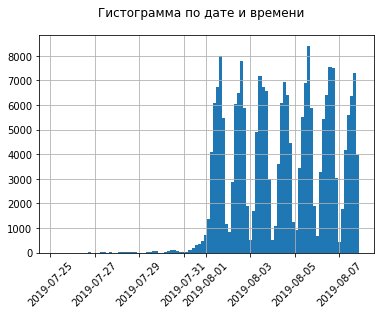

In [19]:
data['date_time'].hist(bins=100)
plt.suptitle("Гистограмма по дате и времени", fontsize=12)
plt.xticks(fontsize=10, rotation=45);

Мы располагаем данными от 25 июля 2019 года до 7 августа 2019 года. При этом видно, что данных за июль крайне мало, вероятно они должны быть исключены из анализа.

In [20]:
data = data[(data['date'] >= '2019-08-01')]

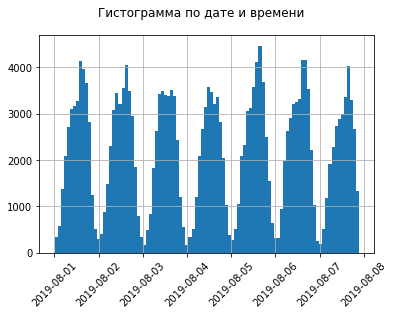

In [21]:
data['date_time'].hist(bins=100)
plt.suptitle("Гистограмма по дате и времени", fontsize=12)
plt.xticks(fontsize=10, rotation=45);

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
Вопрос: почему на одном графике около 50000 событий (максимум), а другом около 35000 и "забор" из столбиков?<br>
Построй пожалуйста графики кол-во событий по часам и сравни будут ли они отличаться от тех, что реализованы тобой</div><br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
<b>Комментарий студента:</b> На обоих графиках увеличил кол-во корзин. Однако на первом больший временной промежуток, поэтому в одной корзину могут складываться больше значений.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
Класс, что ты понимаешь почему в первом случае максимальное значение выше👌 Но почасового графика я не увидел🤔</div><br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
<b>Комментарий студента:</b> Готово ниже

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 3</b><br>Класс👍</div> 

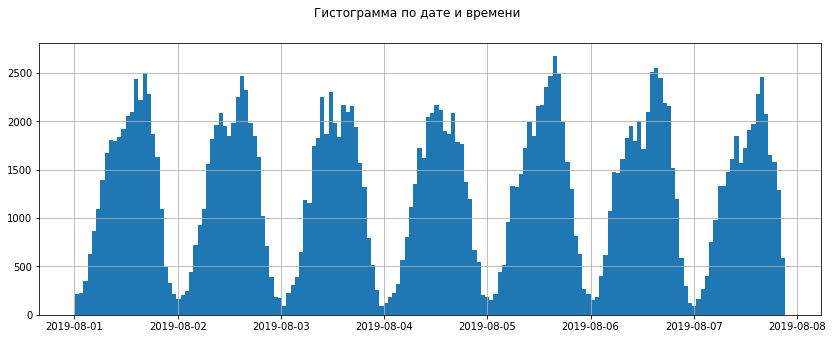

In [22]:
data['date_time'].hist(bins=7*24, figsize=(14, 5))
plt.suptitle("Гистограмма по дате и времени", fontsize=12)
plt.xticks(fontsize=10);

In [23]:
225169 - data['name'].count()

2815

In [24]:
7532 - data['device'].nunique()

17

В результате фильтрации данных по дате, мы исключили из дальнейшего анализа 2815 событий и 17 пользователей

In [25]:
print(data['device'].nunique())
print(data.groupby('experiment')['device'].nunique())
print(data.groupby('experiment')['device'].nunique().sum())

7515
experiment
246    2478
247    2509
248    2528
Name: device, dtype: int64
7515


Среди 7515 уникальных пользователей, в группу 246 вошли 2478, в группу 247 - 2509 и в группу 248 - 2528. При этом пересечений между группами нет

## Изучение воронки событий

In [26]:
print(data['name'].unique())

['Tutorial' 'MainScreenAppear' 'OffersScreenAppear' 'CartScreenAppear'
 'PaymentScreenSuccessful']


In [27]:
data.groupby('name')['device'].count().sort_values(ascending=False)

name
MainScreenAppear           116311
OffersScreenAppear          44453
CartScreenAppear            34175
PaymentScreenSuccessful     26379
Tutorial                     1036
Name: device, dtype: int64

Всего в логах присутствует 5 событий

In [28]:
devices_per_event = data.pivot_table(values='device', index ='name', aggfunc='nunique').sort_values(by='device', ascending=False)
devices_per_event

,device
name,
MainScreenAppear,7400
OffersScreenAppear,4574
CartScreenAppear,3715
PaymentScreenSuccessful,3520
Tutorial,837


In [29]:
MSA = data[data['name'] == 'MainScreenAppear']['device'].nunique() / data['device'].nunique()
print ("{:.2%}".format(MSA))

98.47%


In [30]:
OSA = data[data['name'] == 'OffersScreenAppear']['device'].nunique() / data['device'].nunique()
print ("{:.2%}".format(OSA))

60.86%


In [31]:
CSA = data[data['name'] == 'CartScreenAppear']['device'].nunique() / data['device'].nunique() 
print ("{:.2%}".format(CSA))

49.43%


In [32]:
PSS = data[data['name'] == 'PaymentScreenSuccessful']['device'].nunique() / data['device'].nunique() 
print ("{:.2%}".format(PSS))

46.84%


In [33]:
T = data[data['name'] == 'Tutorial']['device'].nunique() / data['device'].nunique() 
print ("{:.2%}".format(T))

11.14%


Таким образом, 98,47% пользователей совершили хотя бы одно событие

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
Попробуй реализовать расчет как столбец в таблице выше, тк если событий будет не 5, а 25, ручками выполнять расчеты крайне неудобно</div><br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
<b>Комментарий студента:</b> Дай, пожалуйста, подсказку как это сделать? Не понимаю как это циклом провернуть...

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️ 2</b><br>
 В ячейках выше ты делишь кол-во уникальных пользователей по каждому событию на общее кол-во уникальных пользователей.   В таблице <code>devices_per_event</code> в столбце <code>device</code> у тебя указано кол-во уникальных пользователей для каждого событий. Полагаю, необходимо просто разделить этот столбец на общее число уник пользователей и результат сохранить в новый столбец</div><br>

In [34]:
devices_per_event['device'] / data['device'].nunique()

name
MainScreenAppear           0.984697
OffersScreenAppear         0.608649
CartScreenAppear           0.494345
PaymentScreenSuccessful    0.468397
Tutorial                   0.111377
Name: device, dtype: float64

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
<b>Комментарий студента:</b> Готово

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 3</b><br>Именно так, только осталось еще добавить в таблицу:  <code>devices_per_event['percent_of_total'] = devices_per_event['device'] / data['device'].nunique()</code></div> 

Сами события, вероятнее всего, выстраиваются в порядке убывания пользователей, прошедших через них:
1. MainScreenAppear
2. OffersScreenAppear
3. CartScreenAppear
4. PaymentScreenSuccessful

Вместе с тем, Tutorial, может быть не обязательным событием

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Согласен с формированием воронки. Действительно Руководство - опционально!</div> <br>

In [35]:
a = data[data['name'] == 'MainScreenAppear']['device'].nunique() / data['device'].nunique()
print ("{:.2%}".format(a))

98.47%


In [36]:
a_b = OSA / MSA
print ("{:.2%}".format(a_b))

61.81%


In [37]:
b_c = CSA / OSA
print ("{:.2%}".format(b_c))

81.22%


In [38]:
c_d = PSS / CSA
print ("{:.2%}".format(c_d))

94.75%


In [39]:
a_d = PSS/MSA
print ("{:.2%}".format(a_d))

47.57%


Самые большие потери происходят при переходе от главного экрана (с шага А на В). От шага А (главный экран) до шага D (оплата) доходит 47,7% пользователей

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid orange 2px; padding: 20px"> <b>Что можно улучшить - ⚠️</b><br>
Хорошим дополнением будет визуализация воронки при помощи <a href="https://plotly.com/python/funnel-charts/">plotly</a></div> <br>

## Изучение результатов эксперимента

### Сравнение контрольных групп 

Проверим гипотезу о равенстве долей между группами 246 и 247 для каждого из этапов пользовательского пути

In [40]:
userspergroup = data.groupby('experiment')['device'].nunique()
print(userspergroup)

experiment
246    2478
247    2509
248    2528
Name: device, dtype: int64


In [41]:
data_exp = data.pivot_table(values='device', index ='name', columns=['experiment'], aggfunc='nunique')
data_exp

experiment,246,247,248
name,,,
CartScreenAppear,1260,1234,1221
MainScreenAppear,2444,2472,2484
OffersScreenAppear,1536,1516,1522
PaymentScreenSuccessful,1194,1154,1172
Tutorial,276,283,278


In [42]:
start1 = data.query('experiment == 246')['device'].nunique()
start2 = data.query('experiment == 247')['device'].nunique()

a1 = data.query('name == "MainScreenAppear" & experiment == 246')['device'].nunique()
a2 = data.query('name == "MainScreenAppear" & experiment == 247')['device'].nunique()

b1 = data.query('name == "OffersScreenAppear" & experiment == 246')['device'].nunique()
b2 = data.query('name == "OffersScreenAppear" & experiment == 247')['device'].nunique()

c1 = data.query('name == "CartScreenAppear" & experiment == 246')['device'].nunique()
c2 = data.query('name == "CartScreenAppear" & experiment == 247')['device'].nunique()

d1 = data.query('name == "PaymentScreenSuccessful" & experiment == 246')['device'].nunique()
d2 = data.query('name == "PaymentScreenSuccessful" & experiment == 247')['device'].nunique()

**H0** - доли в контрольных группах НЕ имеют различия

**H1** - доли в контрольных группах имеют различия

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа</b><br>
Гипотезы сформулированы верно ✅</div> <br>

Создаем функцию для проверки гипотезы

In [43]:
def check_hypothesis(successes1, successes2, trials1, trials2, alpha=0.01):
    # пропорция успехов в первой группе:
    p1 = successes1/trials1

    # пропорция успехов во второй группе:
    p2 = successes2/trials2

    p_combined = (successes1 + successes2) / (trials1 + trials2)

    difference = p1 - p2
    

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    distr = stats.norm(0, 1) 



    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными")

In [44]:
check_hypothesis(a1,a2,start1,start2)
check_hypothesis(b1,b2,start1,start2)
check_hypothesis(c1,c2,start1,start2)
check_hypothesis(d1,d2,start1,start2)

p-значение:  0.7597211172028002
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.25741687649350364
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.23981995470789697
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.1214116032205168
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Сравнение групп показало, что между долями ни на одном из шагов пользовательского пути нет статистического различия. Таким образом, можем сказать, что разбиение на группы 246 и 247 было коректным

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа - ✅</b><br>
Отличный результат - разницы между группами АА нет, двигаемся дальше!</div> <br>
<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
Оберни пожалуйста код z-test в функцию и автоматизируй проверки при помощи цикла</div><br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
<b>Комментарий студента:</b> Функция готова.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>👍</div> 

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
<b>Комментарий студента:</b> Здесь то же с циклом возникла проблема, можешь дать зацепку?

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️ 2</b><br>
Необходимо реализовать 2 вложенных цикла:
 <ul>
    <li> 1 цикл по парам групп,  [246, 248], [247, 248]....
    <li> 2 цикл по событиям</ul></div><br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
<b>Комментарий студента:</b> Получилось немного по-другому

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 3</b><br>Главное получилось без ручного ввода, молодец👍</div> 

In [45]:
for name in data_exp.index:
    print(name)
    check_hypothesis(data_exp.loc[name, 246],
                     data_exp.loc[name, 247],
                     start1,
                     start2)

CartScreenAppear
p-значение:  0.23981995470789697
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
MainScreenAppear
p-значение:  0.7597211172028002
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
OffersScreenAppear
p-значение:  0.25741687649350364
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
PaymentScreenSuccessful
p-значение:  0.1214116032205168
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Tutorial
p-значение:  0.8742729698592111
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


In [46]:
#CODE REVIEW
# Заготовка
for pair in [[246, 247], [246, 248]]:
    for event in data.query("name!='Tutorial'")['name'].unique():
        print(pair, event)
        #  тут получение необходимых данных для запуска функции check_hypothesis
        #  check_hypothesis(.....)

[246, 247] MainScreenAppear
[246, 247] OffersScreenAppear
[246, 247] CartScreenAppear
[246, 247] PaymentScreenSuccessful
[246, 248] MainScreenAppear
[246, 248] OffersScreenAppear
[246, 248] CartScreenAppear
[246, 248] PaymentScreenSuccessful


<hr style="border: 2px solid red;" />

### Сравнение экспериментальной группы с контрольными

In [47]:
start3 = data.query('experiment == 248')['device'].nunique()

a3 = data.query('name == "MainScreenAppear" & experiment == 248')['device'].nunique()

b3 = data.query('name == "OffersScreenAppear" & experiment == 248')['device'].nunique()

c3 = data.query('name == "CartScreenAppear" & experiment == 248')['device'].nunique()

d3 = data.query('name == "PaymentScreenSuccessful" & experiment == 248')['device'].nunique()

**H0** - доли в первой контрольной группе и экспериментальной НЕ имеют различия

**H1** - доли в первой контрольной группе и экспериментальной имеют различия

In [48]:
for name in data_exp.index:
    print(name)
    check_hypothesis(data_exp.loc[name, 246],
                     data_exp.loc[name, 248],
                     start1,
                     start3)

CartScreenAppear
p-значение:  0.07137934993078021
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
MainScreenAppear
p-значение:  0.2926399053398221
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
OffersScreenAppear
p-значение:  0.19658980240553348
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
PaymentScreenSuccessful
p-значение:  0.19639697924037192
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Tutorial
p-значение:  0.8735172393711175
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между первой контрольной группой и экспериментальной нет значимого отличия

**H0** - доли во второй контрольной группе и экспериментальной НЕ имеют различия

**H1** - доли во второй контрольной группе и экспериментальной имеют различия

In [49]:
for name in data_exp.index:
    print(name)
    check_hypothesis(data_exp.loc[name, 247],
                     data_exp.loc[name, 248],
                     start2,
                     start3)

CartScreenAppear
p-значение:  0.5303260007738086
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
MainScreenAppear
p-значение:  0.45332203958878514
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
OffersScreenAppear
p-значение:  0.8750595593760189
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
PaymentScreenSuccessful
p-значение:  0.7942785692343408
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
Tutorial
p-значение:  0.7499400734599644
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между второй контрольной группой и экспериментальной также нет значимого отличия

### Сравнение экспериментальной группы с объединенной контрольной

In [50]:
start_common = start1 + start2
a_common = a1 + a2
b_common = b1 + b2
c_common = c1 + c2
d_common = d1 + d2

**H0** - доли в объединенной контрольной группе и экспериментальной НЕ имеют различия

**H1** - доли в объединенной контрольной группе и экспериментальной имеют различия

In [51]:
check_hypothesis(a_common,a3,start_common,start3)
check_hypothesis(b_common,b3,start_common,start3)
check_hypothesis(c_common,c3,start_common,start3)
check_hypothesis(d_common,d3,start_common,start3)

p-значение:  0.29048429959357636
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.40444911250834537
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.16101429517364307
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
p-значение:  0.5536216376071339
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


Между объединенной контрольной группой и экспериментальной также нет значимого отличия

In [52]:
print(d1/start1)

0.48184019370460046


In [53]:
print(d2/start2)

0.45994420087684335


In [54]:
print(d_common/start_common)

0.47082414277120516


In [55]:
print(d3/start3)

0.46360759493670883


Подтверждение отсутсвия различия мы видим на совсем небольшой разнице между долями дошедших до последнего этапа пользователей в объединенной контрольной группе и экспериментальной

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid red 2px; padding: 20px"> <b>Что необходимо доработать - ⛔️</b><br>
Вопрос: посчитай сколько проверок гипотез получилось и требуется ли коррекция выбранного статистического уровня значимости</div><br>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> 
<b>Комментарий студента:</b> Уровень значимости скорректировал до 0,01.

<div style="border-radius: 15px; box-shadow: 4px 4px 4px; border: solid green 2px; padding: 20px"> <b>Отличная работа 2</b><br>👍</div> 

## Вывод

В рамках текущего исследования мы: 
1. Изучили воронку продаж; 
2. Установили долю пользователей, которые доходят до покупки
3. Определили, что самых проблемным шагом, на котором "застревают" большинство пользователей является переход с главной страницы к предложению
4. Проведя статистические тесты, мы обнаружили, что ни на одном из шагов покупки нет значимой разницы между контрольными и экспериментальной группами. **Таким образом, изменение шрифтов на сайте не приведет ни к повышению, ни к снижению продаж**

<hr style="border: 2px solid green;" />

## Общий комментарий
Спасибо за проделанную работу🤝

Максим, работа выполнена неплохо, но содержит ряд печалящих ошибок:
- детальнее изучить кол-во событий на пользователя
- скорректировать гистограммы
- автоматизировать расчеты (как для доли пользователей совершивших соыбтия, так и для проверок гипотез)
- обернуть z-test в функцию для вызова в цикле

С общим выводом согласен: шрифт не приводит к каким-либо изменениям, можно использовать.

Исправляй и отправляй на проверку🛠